# Knowledge Graph & NLP Tutorial-(BERT,spaCy,NLTK)

Language is a method of communication with the help of which we can speak, read and write. For example, we think, we make decisions, plans and more in natural language; precisely, in words. However, the big question that confronts us in this AI era is that can we communicate in a similar manner with computers. In other words, can human beings communicate with computers in their natural language? It is a challenge for us to develop NLP applications because computers need structured data, but human speech is unstructured and often ambiguous in nature.

In this sense, we can say that Natural Language Processing (NLP) is the sub-field of Computer Science especially Artificial Intelligence (AI) that is concerned about enabling computers to understand and process human language. Technically, the main task of NLP would be to program computers for analyzing and processing huge amount of natural language data.

### Ambiguity and Uncertainty in Language
Ambiguity, generally used in natural language processing, can be referred as the ability of being understood in more than one way. In simple terms, we can say that ambiguity is the capability of being understood in more than one way. Natural language is very ambiguous. NLP has the following types of ambiguities −

#### Lexical Ambiguity

The ambiguity of a single word is called lexical ambiguity. For example, treating the word silver as a noun, an adjective, or a verb.

#### Syntactic Ambiguity

This kind of ambiguity occurs when a sentence is parsed in different ways. For example, the sentence “The man saw the girl with the telescope”. It is ambiguous whether the man saw the girl carrying a telescope or he saw her through his telescope.

#### Semantic Ambiguity

This kind of ambiguity occurs when the meaning of the words themselves can be misinterpreted. In other words, semantic ambiguity happens when a sentence contains an ambiguous word or phrase. For example, the sentence “The car hit the pole while it was moving” is having semantic ambiguity because the interpretations can be “The car, while moving, hit the pole” and “The car hit the pole while the pole was moving”.

#### Anaphoric Ambiguity

This kind of ambiguity arises due to the use of anaphora entities in discourse. For example, the horse ran up the hill. It was very steep. It soon got tired. Here, the anaphoric reference of “it” in two situations cause ambiguity.

#### Pragmatic ambiguity

Such kind of ambiguity refers to the situation where the context of a phrase gives it multiple interpretations. In simple words, we can say that pragmatic ambiguity arises when the statement is not specific. For example, the sentence “I like you too” can have multiple interpretations like I like you (just like you like me), I like you (just like someone else dose).

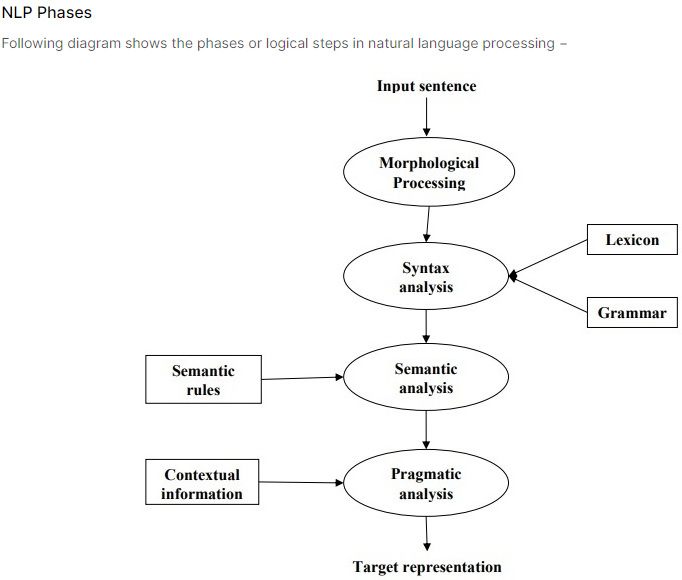

### Morphological Processing

It is the first phase of NLP. The purpose of this phase is to break chunks of language input into sets of tokens corresponding to paragraphs, sentences and words. For example, a word like “uneasy” can be broken into two sub-word tokens as “un-easy”.

### Syntax Analysis

It is the second phase of NLP. The purpose of this phase is two folds: to check that a sentence is well formed or not and to break it up into a structure that shows the syntactic relationships between the different words. For example, the sentence like “The school goes to the boy” would be rejected by syntax analyzer or parser.

### Semantic Analysis

It is the third phase of NLP. The purpose of this phase is to draw exact meaning, or you can say dictionary meaning from the text. The text is checked for meaningfulness. For example, semantic analyzer would reject a sentence like “Hot ice-cream”.

### Pragmatic Analysis

It is the fourth phase of NLP. Pragmatic analysis simply fits the actual objects/events, which exist in a given context with object references obtained during the last phase (semantic analysis). For example, the sentence “Put the banana in the basket on the shelf” can have two semantic interpretations and pragmatic analyzer will choose between these two possibilities.

## 1. Introduction
### 1.1 What is Knowledge Graph?

A knowledge graph is a way of storing data that resulted from an information extraction task. Many basic implementations of knowledge graphs make use of a concept we call triple, that is a set of three items(a subject, a predicate and an object) that we can use to store information about something.

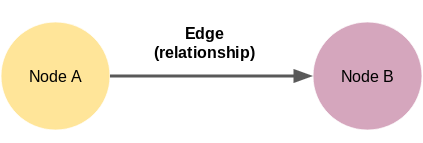

Node A and Node B here are two different entities. These nodes are connected by an edge that represents the relationship between the two nodes. Now, this is the smallest knowledge graph we can build – it is also known as a triple.Knowledge Graph’s come in a variety of shapes and sizes.

### 1.2 Data Representation in Knowledge Graph?

Let's take this sentence as an example:

**London is the capital of England. Westminster is located in London.**

After some basic processing which we will see later, we would 2 triples like this:

**(London, be capital, England), (Westminster, locate, London)**

So in this example we have three unique entities(London, England and Westminster) and two relations(be capital, locate). To build a knowledge graph, we only have two associated nodes in the graph with the entities and vertices with the relations and we will get something like this:Manually building a knowledge graph is not scalable. Nobody is going to go through thousands of documents and extract all the entities and the relations between them!

That’s why machines are more suitable to perform this task as going through even hundreds or thousands of documents is child’s play for them. But then there is another challenge – machines do not understand natural language. This is where Natural Language Processing (NLP) comes into the picture.

To build a knowledge graph from the text, it is important to make our machine understand natural language. This can be done by using NLP techniques such as sentence segmentation, dependency parsing, parts of speech tagging, and entity recognition.

### 1.3 Import Dependencies & Load dataset


In [1]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [3]:
data = pd.read_csv("Combined Reddit Data/Before Covid/Clean_Data_Before_Covid.csv")
print(data.shape)
data.head()

(31790, 2)


,id,final
0,ffbxc48,alternative economic model needed native americans aboriginal australians indigenous peoples provide models thousands years work west colonized lands silenced erased ways living need new model lis...
1,ffc5i6h,splutters tea dude owns duchy cornwall sure hes somewhat environmentally friendly hes personally benefitted hugely business usual
2,ff8z7yf,garbage half necessarily correct spell hair correctly included petroleum wtf quit exploiting real issues push shitty blog
3,ff8znss,hello thank comment dedicated learn strive ecofriendly lifestyle far perfect thought people interested learn way sorry feel unhappy misspelled word hair correct love learn blog week old best hopin...
4,ff8i5we,sounds great wood wooden buildings look nice definitely increased fire risk hopefully good sprinkler system mitigate article point fire resistance clt wood experiments laminate damaged allow wood ...


In [206]:
len(data)

32357

In [9]:
df = pd.read_csv("Combined Reddit Data/Before Covid/finalmerged.csv")
df.head()

,id,content
0,ffbxc48,"An alternative economic model is needed, but Native Americans, Aboriginal Australians, and many other Indigenous Peoples provide models that have been around for thousands of years that seemed to ..."
1,ffc5i6h,\*splutters tea everywhere\* The dude _owns_ the Duchy of Cornwall. Sure he’s been somewhat environmentally friendly but he’s personally benefitted hugely from business as usual.
2,ff8z7yf,"This is garbage.\n\nHalf of these aren't even necessarily correct. And you didn't even spell ""hair"" correctly.\n\nAnd you included petroleum. Wtf? \n\nQuit exploiting real issues to push your shit..."
3,ff8znss,"Hello, thank you for your comment. \nI am myself dedicated to learn and strive towards a more \neco-friendly lifestyle (I am far from perfect) and thought people might be interested into what I le..."
4,ff8i5we,It sounds great using wood and wooden buildings can look really nice but there is definitely an increased fire risk. Hopefully a good sprinkler system will be enough to mitigate.\n\nThe article do...


In [10]:
df= df.replace(r'\n',' ', regex=True)
df = df.replace(r'\\n',' ', regex=True)
df = df.replace(r'/r/',' ', regex=True)

In [11]:
df = df.dropna()

In [54]:
df.head()

,id,content
0,ffbxc48,"An alternative economic model is needed, but Native Americans, Aboriginal Australians, and many other Indigenous Peoples provide models that have been around for thousands of years that seemed to ..."
1,ffc5i6h,\*splutters tea everywhere\* The dude _owns_ the Duchy of Cornwall. Sure he’s been somewhat environmentally friendly but he’s personally benefitted hugely from business as usual.
2,ff8z7yf,"This is garbage. Half of these aren't even necessarily correct. And you didn't even spell ""hair"" correctly. And you included petroleum. Wtf? Quit exploiting real issues to push your shitty blog."
3,ff8znss,"Hello, thank you for your comment. I am myself dedicated to learn and strive towards a more eco-friendly lifestyle (I am far from perfect) and thought people might be interested into what I lear..."
4,ff8i5we,It sounds great using wood and wooden buildings can look really nice but there is definitely an increased fire risk. Hopefully a good sprinkler system will be enough to mitigate. The article does...


In [12]:
df1 = df.copy()

In [13]:
df1 = df1.rename(columns={'content':'body'})

In [14]:
df1 = df1.loc[df1["body"] != "[deleted]"]
df1 = df1.loc[df1["body"] != "[removed]"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Account age too young, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Not enough comment karma, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Thank you!"]
df1 = df1.loc[df1["body"] != '!emissionsbot']
df1 = df1.loc[df1["body"] != 'Thank you']
df1 = df1.loc[df1["body"] != 'Thank you.']
df1 = df1.loc[df1["body"] != '/r/careerguidance']
df1 = df1.loc[df1["body"] != 'Thanks!']
df1 = df1.loc[df1["body"] != 'No']
df1 = df1.loc[df1["body"] != 'Lol']
df1 = df1.loc[df1["body"] != 'No.']
df1 = df1.loc[df1["body"] != 'Source?']
df1 = df1.loc[df1["body"] != 'x-post: /r/EnviroNews']
df1 = df1.loc[df1["body"] != 'Thank you!!!']
df1 = df1.loc[df1["body"] != '?']
df1 = df1.loc[df1["body"] != 'Thanks']
df1 = df1.loc[df1["body"] != 'Yes']
df1 = df1.loc[df1["body"] != 'Yes.']
df1 = df1.loc[df1["body"] != 'Thank you!!']
df1 = df1.loc[df1["body"] != ':(']
df1 = df1.loc[df1["body"] != '/r/Green does not allow image submissions.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*']
df1 = df1.loc[df1["body"] != 'Green  ']

In [15]:
df1.shape

(32357, 2)

In [16]:
slang_dict = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"OMG": "Surprised",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest / Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My Ass Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The Ass",
"PRT": "Party",
"PRW": "Parents Are Watching",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The Fuck",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait"
}

In [17]:
def slang(x):
    if type(x) is str:
        for key in slang_dict:
            value = slang_dict[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [18]:
df1["body"] =df1["body"].apply(lambda x: slang(x))

In [19]:
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"here's": "here is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [20]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.lower().replace(key,value)
        return x
    else:
        return x

In [21]:
df1["body"] =df1["body"].apply(lambda x: cont_to_exp(x))

#### After expanding SLANGS and CONTRACTIONS, 
we need to save copy the dataset to another one because we dont want to lose it if preprocessing donest work properly.


In [55]:
df1.head()

,id,body
0,ffbxc48,"an alternative economic model is needed, but native americans, aboriginal australians, and many other indigenous peoples provide models that have been around for thousands of years that seemed to ..."
1,ffc5i6h,\*splutters tea everywhere\* the dude _owns_ the duchy of cornwall. sure he’s been somewhat environmentally friendly but he’s personally benefitted hugely from business as usual.
2,ff8z7yf,"this is garbage. half of these are not / am not even necessarily correct. and you did not even spell ""hair"" correctly. and you included petroleum. wtf? quit exploiting real issues to push your..."
3,ff8znss,"hello, thank you for your comment. i am myself dedicated to learn and strive towards a more eco-friendly lifestyle (i am far from perfect) and thought people might be interested into what i lear..."
4,ff8i5we,it sounds great using wood and wooden buildings can look really nice but there is definitely an increased fire risk. hopefully a good sprinkler system will be enough to mitigate. the article does...


In [50]:
data = df1.copy()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32357 entries, 0 to 33238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32357 non-null  object
 1   body    32357 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [22]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [23]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [25]:
import nltk
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [26]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

## Building a text normalizer

In [32]:
import neattext as nt
import unicodedata

In [28]:
def normalize_corpus(corpus, html_stripping=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        
        # strip HTML
        if html_stripping:
            doc = nt.remove_html_tags(doc)
            doc = nt.remove_urls(doc)
            doc = nt.remove_hashtags(doc)
        
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        
        # remove special characters and\or digits    
        if special_char_removal:
            doc = nt.remove_special_characters(doc)
            doc = nt.remove_puncts(doc)
            
        
        # remove extra whitespace
        doc = nt.remove_multiple_spaces(doc)
        
        
        # remove stopwords
        if stopword_removal:
            doc = nt.remove_stopwords(doc)
            doc = nt.remove_currencies(doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [56]:
data.head()

,id,body
0,ffbxc48,"an alternative economic model is needed, but native americans, aboriginal australians, and many other indigenous peoples provide models that have been around for thousands of years that seemed to ..."
1,ffc5i6h,\*splutters tea everywhere\* the dude _owns_ the duchy of cornwall. sure he’s been somewhat environmentally friendly but he’s personally benefitted hugely from business as usual.
2,ff8z7yf,"this is garbage. half of these are not / am not even necessarily correct. and you did not even spell ""hair"" correctly. and you included petroleum. wtf? quit exploiting real issues to push your..."
3,ff8znss,"hello, thank you for your comment. i am myself dedicated to learn and strive towards a more eco-friendly lifestyle (i am far from perfect) and thought people might be interested into what i lear..."
4,ff8i5we,it sounds great using wood and wooden buildings can look really nice but there is definitely an increased fire risk. hopefully a good sprinkler system will be enough to mitigate. the article does...


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32357 entries, 0 to 33238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32357 non-null  object
 1   body    32357 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [35]:
data = data.dropna()

In [58]:
data["first_text"] = normalize_corpus(data['body'], html_stripping=True,
                     accented_char_removal=False, text_lower_case=False, 
                     text_lemmatization=False, special_char_removal=True, 
                     stopword_removal=False, remove_digits=False)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32357 entries, 0 to 33238
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          32357 non-null  object
 1   body        32357 non-null  object
 2   first_text  32357 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


In [60]:
data.head()

,id,body,first_text
0,ffbxc48,"an alternative economic model is needed, but native americans, aboriginal australians, and many other indigenous peoples provide models that have been around for thousands of years that seemed to ...",an alternative economic model is needed but native americans aboriginal australians and many other indigenous peoples provide models that have been around for thousands of years that seemed to wor...
1,ffc5i6h,\*splutters tea everywhere\* the dude _owns_ the duchy of cornwall. sure he’s been somewhat environmentally friendly but he’s personally benefitted hugely from business as usual.,splutters tea everywhere the dude owns the duchy of cornwall sure hes been somewhat environmentally friendly but hes personally benefitted hugely from business as usual
2,ff8z7yf,"this is garbage. half of these are not / am not even necessarily correct. and you did not even spell ""hair"" correctly. and you included petroleum. wtf? quit exploiting real issues to push your...",this is garbage half of these are not am not even necessarily correct and you did not even spell hair correctly and you included petroleum wtf quit exploiting real issues to push your shitty blog
3,ff8znss,"hello, thank you for your comment. i am myself dedicated to learn and strive towards a more eco-friendly lifestyle (i am far from perfect) and thought people might be interested into what i lear...",hello thank you for your comment i am myself dedicated to learn and strive towards a more ecofriendly lifestyle i am far from perfect and thought people might be interested into what i learn mysel...
4,ff8i5we,it sounds great using wood and wooden buildings can look really nice but there is definitely an increased fire risk. hopefully a good sprinkler system will be enough to mitigate. the article does...,it sounds great using wood and wooden buildings can look really nice but there is definitely an increased fire risk hopefully a good sprinkler system will be enough to mitigate the article does po...


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32357 entries, 0 to 33238
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          32357 non-null  object
 1   body        32357 non-null  object
 2   first_text  32357 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


### 1.4 Sentence Segmentation
The first step in building a knowledge graph is to split the text document or article into sentences. Then, we will shortlist only those sentences in which there is exactly 1 subject and 1 object.

In [62]:
sentence = str(data.iloc[0].first_text)

In [63]:
sentence

'an alternative economic model is needed but native americans aboriginal australians and many other indigenous peoples provide models that have been around for thousands of years that seemed to work as the west colonized their lands they also silenced and erased their ways of living we might not need a new model but rather to listen to all the voices that the princes ancestors conquered and killed from capitalism to indigenous thought'

In [64]:
doc = nlp(sentence)

for tok in doc:
  print(tok.text, "...", tok.dep_)

an ... det
alternative ... amod
economic ... amod
model ... nsubjpass
is ... auxpass
needed ... ROOT
but ... cc
native ... amod
americans ... nmod
aboriginal ... amod
australians ... nsubj
and ... cc
many ... amod
other ... amod
indigenous ... amod
peoples ... conj
provide ... conj
models ... dobj
that ... nsubj
have ... aux
been ... relcl
around ... advmod
for ... prep
thousands ... pobj
of ... prep
years ... pobj
that ... nsubj
seemed ... relcl
to ... aux
work ... xcomp
as ... mark
the ... det
west ... nsubj
colonized ... advcl
their ... poss
lands ... dobj
they ... nsubj
also ... advmod
silenced ... relcl
and ... cc
erased ... conj
their ... poss
ways ... dobj
of ... prep
living ... pcomp
we ... nsubj
might ... aux
not ... neg
need ... ROOT
a ... det
new ... amod
model ... dobj
but ... cc
rather ... advmod
to ... aux
listen ... conj
to ... prep
all ... predet
the ... det
voices ... pobj
that ... mark
the ... det
princes ... compound
ancestors ... nsubj
conquered ... relcl
and ... cc

### 1.5 Entities Extraction
The extraction of a single word entity from a sentence is not a tough task. We can easily do this with the help of parts of speech (POS) tags. The nouns and the proper nouns would be our entities.

However, when an entity spans across multiple words, then POS tags alone are not sufficient. We need to parse the dependency tree of the sentence.

To build a knowledge graph, the most important things are the nodes and the edges between them.

These nodes are going to be the entities that are present in the Reddit submissions. Edges are the relationships connecting these entities to one another. We will extract these elements in an unsupervised manner, i.e., we will use the grammar of the sentences.

The main idea is to go through a sentence and extract the subject and the object as and when they are encountered. However, there are a few challenges ⁠— an entity can span across multiple words, eg., “red wine”, and the dependency parsers tag only the individual words as subjects or objects.

So, I have created a function below to extract the subject and the object (entities) from a sentence while also overcoming the challenges mentioned above. I have partitioned the code into multiple chunks for your convenience:

In [72]:
spacy_pos_tagged = [(word, word.tag_, word.pos_, word.dep_, spacy.explain(word.pos_), spacy.explain(word.tag_) ) for word in doc]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type', "DEP", "POS Explained", "TAG Explained"])

,Word,POS tag,Tag type,DEP,POS Explained,TAG Explained
0,an,DT,DET,det,determiner,determiner
1,alternative,JJ,ADJ,amod,adjective,adjective
2,economic,JJ,ADJ,amod,adjective,adjective
3,model,NN,NOUN,nsubjpass,noun,"noun, singular or mass"
4,is,VBZ,AUX,auxpass,auxiliary,"verb, 3rd person singular present"
...,...,...,...,...,...,...
67,from,IN,ADP,prep,adposition,"conjunction, subordinating or preposition"
68,capitalism,NN,NOUN,pobj,noun,"noun, singular or mass"
69,to,IN,ADP,prep,adposition,"conjunction, subordinating or preposition"
70,indigenous,JJ,ADJ,amod,adjective,adjective


In [149]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
            
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

            
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

        

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

        
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text

        
  #############################################################

  return [ent1.strip(), ent2.strip()]
    

In [150]:
# As we defined above, our sentence is the first submission of reddit in string format.
sentence

'an alternative economic model is needed but native americans aboriginal australians and many other indigenous peoples provide models that have been around for thousands of years that seemed to work as the west colonized their lands they also silenced and erased their ways of living we might not need a new model but rather to listen to all the voices that the princes ancestors conquered and killed from capitalism to indigenous thought'

**Chunk 1**

Defined a few empty variables in this chunk. prv_tok_dep and prv_tok_text will hold the dependency tag of the previous word in the sentence and that previous word itself, respectively. prefix and modifier will hold the text that is associated with the subject or the object.

**Chunk 2**

Next, we will loop through the tokens in the sentence. We will first check if the token is a punctuation mark or not. If yes, then we will ignore it and move on to the next token. If the token is a part of a compound word (dependency tag = “compound”), we will keep it in the prefix variable. A compound word is a combination of multiple words linked to form a word with a new meaning (example – “Football Stadium”, “animal lover”).

As and when we come across a subject or an object in the sentence, we will add this prefix to it. We will do the same thing with the modifier words, such as “nice shirt”, “big house”, etc.

**Chunk 3**

Here, if the token is the subject, then it will be captured as the first entity in the ent1 variable. Variables such as prefix, modifier, prv_tok_dep, and prv_tok_text will be reset.

**Chunk 4**

Here, if the token is the object, then it will be captured as the second entity in the ent2 variable. Variables such as prefix, modifier, prv_tok_dep, and prv_tok_text will again be reset.

**Chunk 5**

Once we have captured the subject and the object in the sentence, we will update the previous token and its dependency tag.

Let’s test this function on a sentence:

In [151]:
get_entities(sentence)

['rather princes ancestors', 'indigenous  thought']

As shown above, in our example it doesnt work properly.

In [160]:
sentence

'an alternative economic model is needed but native americans aboriginal australians and many other indigenous peoples provide models that have been around for thousands of years that seemed to work as the west colonized their lands they also silenced and erased their ways of living we might not need a new model but rather to listen to all the voices that the princes ancestors conquered and killed from capitalism to indigenous thought'

In [159]:
get_entities("I eventually like his cousin. However, she doesn't like my behaviours")


['However  she', 'behaviours']

Now we can use this function to extract these entity pairs for all the sentences in our data:

In [226]:
candidate_sentences = data["first_text"][0:400]


In [208]:
(candidate_sentences)

0       an alternative economic model is needed but native americans aboriginal australians and many other indigenous peoples provide models that have been around for thousands of years that seemed to wor...
1                                      splutters tea everywhere the dude owns the duchy of cornwall sure hes been somewhat environmentally friendly but hes personally benefitted hugely from business as usual
2           this is garbage half of these are not am not even necessarily correct and you did not even spell hair correctly and you included petroleum wtf quit exploiting real issues to push your shitty blog
3       hello thank you for your comment i am myself dedicated to learn and strive towards a more ecofriendly lifestyle i am far from perfect and thought people might be interested into what i learn mysel...
4       it sounds great using wood and wooden buildings can look really nice but there is definitely an increased fire risk hopefully a good sprinkler system will be en

In [227]:
entity_pairs = []

for i in tqdm(candidate_sentences):
  entity_pairs.append(get_entities(i))



  0%|          | 0/400 [00:00<?, ?it/s]

  2%|▎         | 10/400 [00:00<00:03, 99.01it/s]

  6%|▌         | 24/400 [00:00<00:03, 116.84it/s]

 11%|█         | 43/400 [00:00<00:02, 146.01it/s]

 14%|█▍        | 58/400 [00:00<00:02, 141.06it/s]

 18%|█▊        | 73/400 [00:00<00:02, 143.63it/s]

 22%|██▏       | 88/400 [00:00<00:02, 115.13it/s]

 25%|██▌       | 101/400 [00:00<00:03, 79.86it/s]

 28%|██▊       | 111/400 [00:01<00:03, 75.05it/s]

 30%|███       | 120/400 [00:01<00:03, 71.34it/s]

 34%|███▎      | 134/400 [00:01<00:03, 85.08it/s]

 37%|███▋      | 147/400 [00:01<00:02, 93.96it/s]

 40%|███▉      | 158/400 [00:01<00:02, 90.56it/s]

 42%|████▏     | 168/400 [00:01<00:02, 90.22it/s]

 46%|████▌     | 182/400 [00:01<00:02, 102.84it/s]

 50%|████▉     | 199/400 [00:01<00:01, 119.75it/s]

 54%|█████▍    | 215/400 [00:02<00:01, 129.71it/s]

 57%|█████▊    | 230/400 [00:02<00:01, 132.06it/s]

 62%|██████▏   | 247/400 [00:02<00:01, 139.18it/s]

 66%|██████▌   | 262/400 [00:02<00:

The list entity_pairs contains all the subject-object pairs from the Reddit sentences. Let’s have a look at a few of them:

In [211]:
entity_pairs[10:20]

[['', ''],
 ['now  i', 'uplifting this'],
 ['automatically  you', 'questions'],
 ['faster  they', ''],
 ['they', 'next  level'],
 ['they', 'away  silicon'],
 ['', ''],
 ['it', 'people'],
 ['only  this', 'only  same'],
 ['0 carbon they', 'it']]

In [228]:
len(entity_pairs)

400

### 1.6 Relations Extraction

Entity extraction is half the job done. To build a knowledge graph, we need edges to connect the nodes (entities) to one another. These edges are the relations between a pair of nodes.

Our hypothesis is that the predicate is actually the main verb in a sentence.

For example, in the sentence – “Sixty Hollywood musicals were released in 1929”, the verb is “released in” and this is what we are going to use as the predicate for the triple generated from this sentence.

The function below is capable of capturing such predicates from the sentences. Here, I have used spaCy’s rule-based matching:

In [161]:
def get_relation(sent):
    
    doc = nlp(sent)
    
    # Matcher class object 
    matcher = Matcher(nlp.vocab)
    
    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
              {'DEP':'prep','OP':"?"},
              {'DEP':'agent','OP':"?"},  
              {'POS':'ADJ','OP':"?"}] 
    
    matcher.add("matching_1", None, pattern) 
    matches = matcher(doc)
    
    k = len(matches) - 1
    
    span = doc[matches[k][1]:matches[k][2]] 
    
    return(span.text)

The pattern defined in the function tries to find the ROOT word or the main verb in the sentence. Once the ROOT is identified, then the pattern checks whether it is followed by a preposition (‘prep’) or an agent word. If yes, then it is added to the ROOT word. Let me show you a glimpse of this function:

In [168]:
get_relation("I eventually like his cousin. However, she ignored my behaviours")


'ignored'

In [229]:
relations = [get_relation(i) for i in tqdm(candidate_sentences)]


100%|██████████| 400/400 [00:03<00:00, 117.51it/s]


In [230]:
pd.Series(relations).value_counts()[:50]

is             42
green          12
performed      12
are            11
has            10
have            9
think           8
was             6
need            5
understand      4
be              4
am              4
get             4
say             4
says            3
going           3
re              3
had             3
follow          3
doing           3
hope            2
deleted         2
generate        2
got             2
save            2
bought          2
shall           2
thank           2
deadline        2
love            2
said            2
make            2
seems           2
cool            2
bot             2
read            2
see             2
felt            2
is great        2
has low         1
lost            1
helps           1
remember        1
call            1
kids            1
drill           1
believe         1
both            1
brilliant       1
sounds like     1
dtype: int64

### 1.7 Build Knowledge Graph

We will finally create a knowledge graph from the extracted entities (subject-object pairs) and the predicates (relation between entities).

Let’s create a dataframe of entities and predicates:

In [231]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [232]:
len(source)

400

In [233]:
len(target)

400

In [234]:
len(relations)

400

Next, we will use the networkx library to create a network from this dataframe. The nodes will represent the entities and the edges or connections between the nodes will represent the relations between the nodes.

It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, it is only from one node to another.

In [235]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

  2%|▏         | 488/32357 [1:49:36<119:18:18, 13.48s/it]


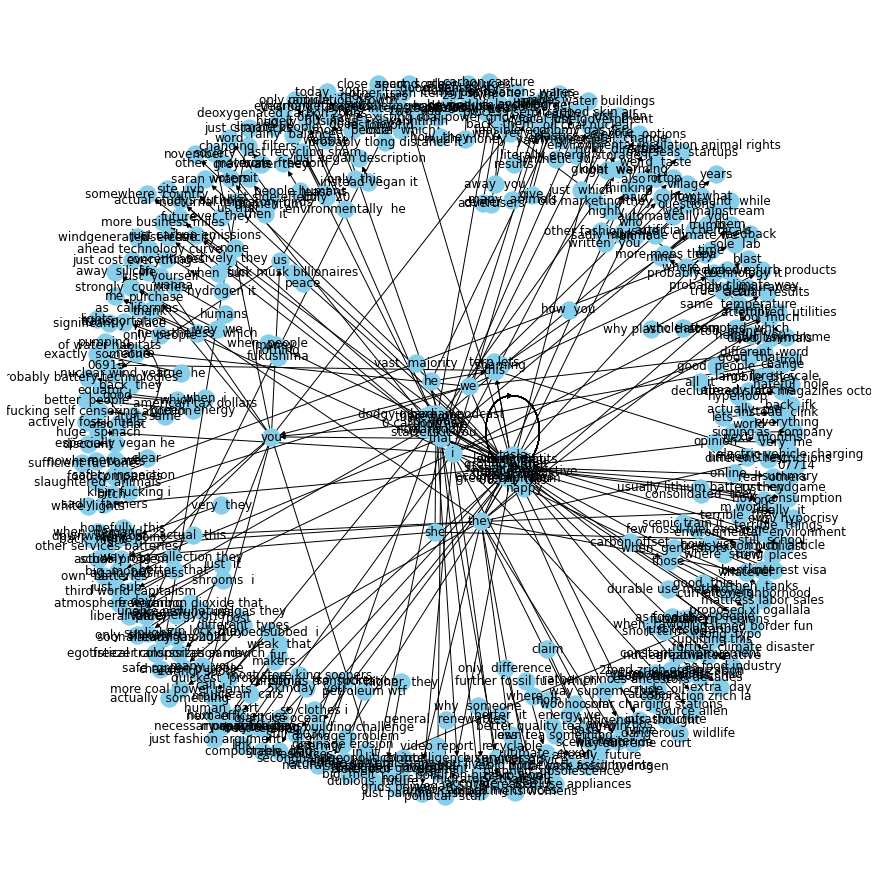

In [236]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Well, this is not exactly what we were hoping for (still looks quite a sight though!).

It turns out that we have created a graph with all the relations that we had. It becomes really hard to visualize a graph with these many relations or predicates.

So, it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. Let’s start with the relation “composed by”:

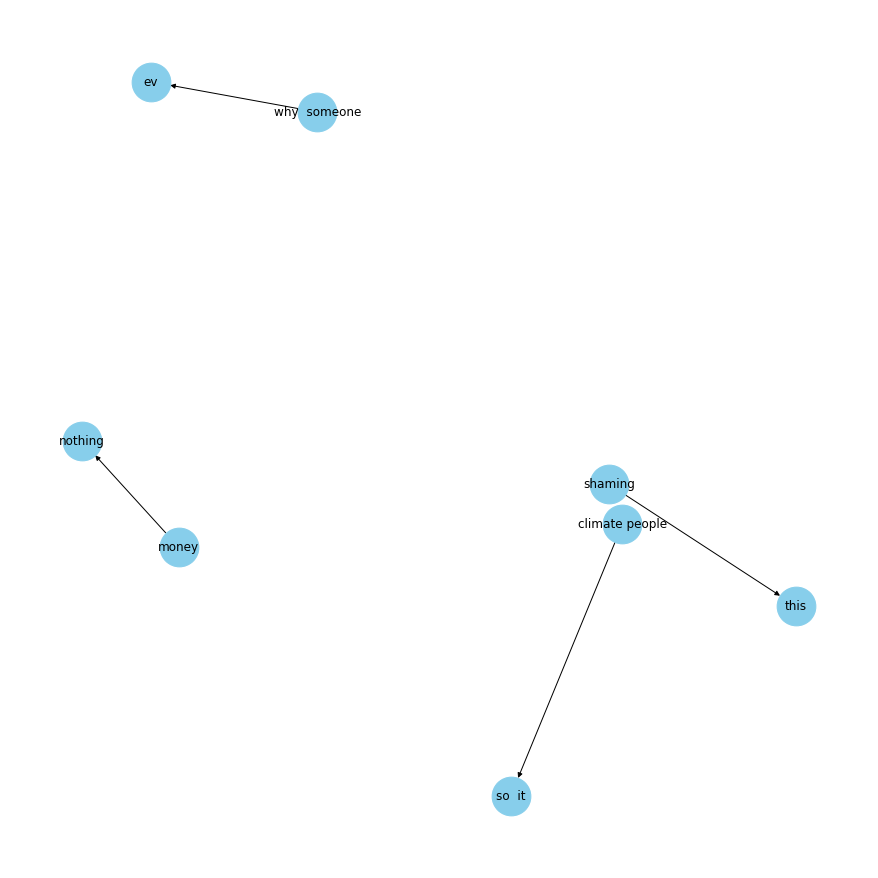

In [239]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="understand"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

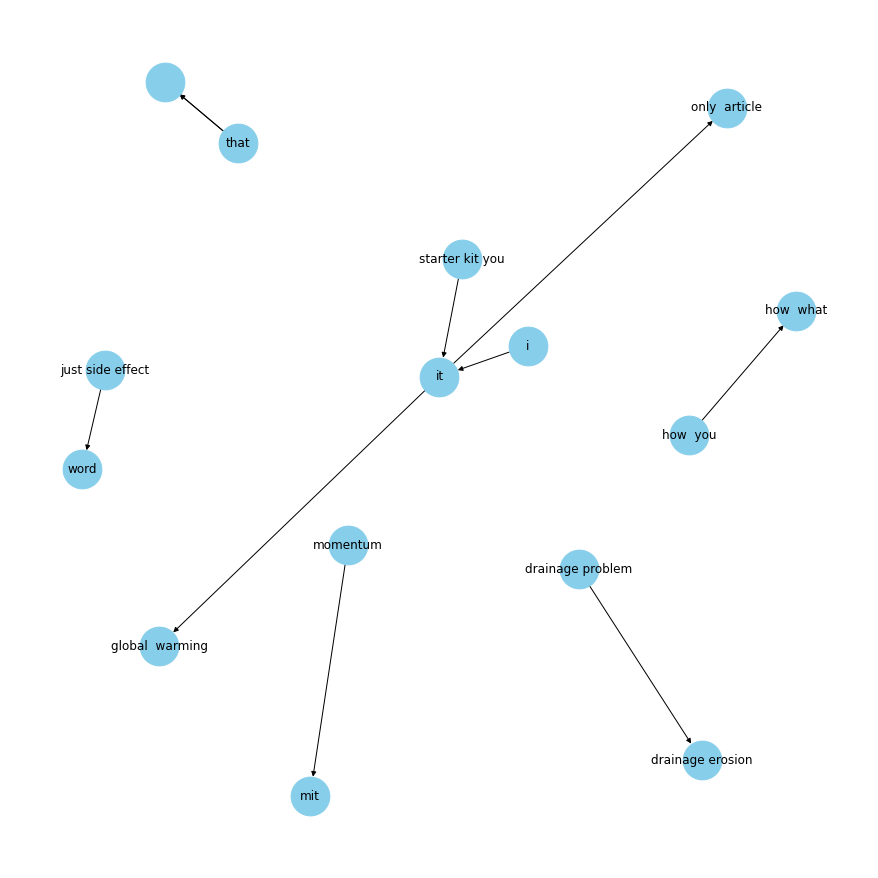

In [240]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="has"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

This knowledge graph is giving us some extraordinary information.

# BERT

## 1. Introduction
At the end of 2018 researchers at Google AI Language open-sourced a new technique for Natural Language Processing (NLP) called BERT (Bidirectional Encoder Representations from Transformers) — a major breakthrough which took the Deep Learning community by storm because of its incredible performance.

### 1.1 What is BERT?
BERT stands for Bidirectional Encoder Representations from Transformers. Let us understand this in detail each word .

Bidirectional - to understand the text you’re looking you’ll have to look back (at the previous words) and forward (at the next words)
Transformers - The Attention Is All You Need paper presented the Transformer model. The Transformer reads entire sequences of tokens at once. In a sense, the model is non-directional, while LSTMs read sequentially (left-to-right or right-to-left). The attention mechanism allows for learning contextual relations between words (e.g. his in a sentence refers to Jim).
(Pre-trained) contextualized word embeddings - The ELMO paper introduced a way to encode words based on their meaning/context. Nails has multiple meanings - fingernails and metal nails.
BERT was trained by masking 15% of the tokens with the goal to guess them. An additional objective was to predict the next sentence.

### 1.2 Architecture
The original BERT model was developed and trained by Google using TensorFlow. BERT is released in two sizes BERTBASE and BERTLARGE.

The BASE model is used to measure the performance of the architecture comparable to another architecture and the LARGE model produces state-of-the-art results that were reported in the research paper.

One of the main reasons for the good performance of BERT on different NLP tasks was the use of Semi-Supervised Learning. This means the model is trained for a specific task that enables it to understand the patterns of the language. After training the model (BERT) has language processing capabilities that can be used to empower other models that we build and train using supervised learning.

BERT is basically an Encoder stack of transformer architecture. A transformer architecture is an encoder-decoder network that uses self-attention on the encoder side and attention on the decoder side.

BERTBASE has 12 layers in the Encoder stack while BERTLARGE has 24 layers in the Encoder stack. These are more than the Transformer architecture described in the original paper (6 encoder layers).

BERT architectures (BASE and LARGE) also have larger feedforward-networks (768 and 1024 hidden units respectively), and more attention heads (12 and 16 respectively) than the Transformer architecture suggested in the original paper. It contains 512 hidden units and 8 attention heads.

BERTBASE contains 110M parameters while BERTLARGE has 340M parameters.

So in summary:

- BERT-Base: 12 layer Encoder / Decoder, d = 768, 110M parameters
- BERT-Large: 24 layer Encoder / Decoder, d = 1024, 340M parameters

where d is the dimensionality of the final hidden vector output by BERT. Both of these have a Cased and an Uncased version (the Uncased version converts all words to lowercase).

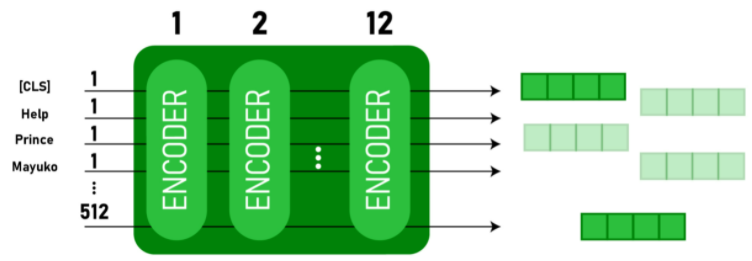

This model takes CLS token as input first, then it is followed by a sequence of words as input. Here CLS is a classification token. It then passes the input to the above layers. Each layer applies self-attention, passes the result through a feedforward network after then it hands off to the next encoder.

The model outputs a vector of hidden size (768 for BERT BASE). If we want to output a classifier from this model we can take the output corresponding to CLS token.

### 1.3 Why we needed BERT?
One of the biggest challenges in NLP is the lack of enough training data. Overall there is enormous amount of text data available, but if we want to create task-specific datasets, we need to split that pile into the very many diverse fields. And when we do this, we end up with only a few thousand or a few hundred thousand human-labeled training examples. Unfortunately, in order to perform well, deep learning based NLP models require much larger amounts of data — they see major improvements when trained on millions, or billions, of annotated training examples.

To help bridge this gap in data, researchers have developed various techniques for training general purpose language representation models using the enormous piles of unannotated text on the web (this is known as pre-training). These general purpose pre-trained models can then be fine-tuned on smaller task-specific datasets, e.g., when working with problems like question answering and sentiment analysis. This approach results in great accuracy improvements compared to training on the smaller task-specific datasets from scratch. BERT is a recent addition to these techniques for NLP pre-training; it caused a stir in the deep learning community because it presented state-of-the-art results in a wide variety of NLP tasks, like question answering.

The best part about BERT is that it can be download and used for free — we can either use the BERT models to extract high quality language features from our text data, or we can fine-tune these models on a specific task, like sentiment analysis and question answering, with our own data to produce state-of-the-art predictions.

In **summary** the following are the main benefits of using BERT:

#### Easy Training

First, the pre-trained BERT model weights already encode a lot of information about our language. As a result, it takes much less time to train our fine-tuned model - it is as if we have already trained the bottom layers of our network extensively and only need to gently tune them while using their output as features for our classification task. In fact, the authors recommend only 2-4 epochs of training for fine-tuning BERT on a specific NLP task (compared to the hundreds of GPU hours needed to train the original BERT model or a LSTM from scratch!).

#### Less Data

In addition and perhaps just as important, because of the pre-trained weights this method allows us to fine-tune our task on a much smaller dataset than would be required in a model that is built from scratch. A major drawback of NLP models built from scratch is that we often need a prohibitively large dataset in order to train our network to reasonable accuracy, meaning a lot of time and energy had to be put into dataset creation. By fine-tuning BERT, we are now able to get away with training a model to good performance on a much smaller amount of training data.

#### Good Results

Second, this simple fine-tuning procedure (typically adding one fully-connected layer on top of BERT and training for a few epochs) was shown to achieve state of the art results with minimal task-specific adjustments for a wide variety of tasks: classification, language inference, semantic similarity, question answering, etc. Rather than implementing custom and sometimes-obscure architetures shown to work well on a specific task, simply fine-tuning BERT is shown to be a better (or at least equal) alternative.

#### A Shift in NLP

This shift to transfer learning parallels the same shift that took place in computer vision a few years ago. Creating a good deep learning network for computer vision tasks can take millions of parameters and be very expensive to train. Researchers discovered that deep networks learn hierarchical feature representations (simple features like edges at the lowest layers with gradually more complex features at higher layers). Rather than training a new network from scratch each time, the lower layers of a trained network with generalized image features could be copied and transfered for use in another network with a different task. It soon became common practice to download a pre-trained deep network and quickly retrain it for the new task or add additional layers on top - vastly preferable to the expensive process of training a network from scratch. For many, the introduction of deep pre-trained language models in 2018 (ELMO, BERT, ULMFIT, Open-GPT, etc.) signals the same shift to transfer learning in NLP that computer vision saw.

### 1.4 Core Idea of BERT
What is language modeling really about? Which problem are language models trying to solve? Basically, their task is to “fill in the blank” based on context. For example, given

“The woman went to the store and bought a _ of shoes.”

a language model might complete this sentence by saying that the word “cart” would fill the blank 20% of the time and the word “pair” 80% of the time.

In the pre-BERT world, a language model would have looked at this text sequence during training from either left-to-right or combined left-to-right and right-to-left. This one-directional approach works well for generating sentences — we can predict the next word, append that to the sequence, then predict the next to next word until we have a complete sentence.

Now enters BERT, a language model which is bidirectionally trained (this is also its key technical innovation). This means we can now have a deeper sense of language context and flow compared to the single-direction language models.

Instead of predicting the next word in a sequence, BERT makes use of a novel technique called Masked LM (MLM): it randomly masks words in the sentence and then it tries to predict them. Masking means that the model looks in both directions and it uses the full context of the sentence, both left and right surroundings, in order to predict the masked word. Unlike the previous language models, it takes both the previous and next tokens into account at the same time. The existing combined left-to-right and right-to-left LSTM based models were missing this “same-time part”. (It might be more accurate to say that BERT is non-directional though.)

But why is this non-directional approach so powerful?

Pre-trained language representations can either be context-free or context-based. Context-based representations can then be unidirectional or bidirectional. Context-free models like word2vec generate a single word embedding representation (a vector of numbers) for each word in the vocabulary.

For example, the word “bank” would have the same context-free representation in “bank account” and “bank of the river.” On the other hand, context-based models generate a representation of each word that is based on the other words in the sentence. For example, in the sentence “I accessed the bank account,” a unidirectional contextual model would represent “bank” based on “I accessed the” but not “account.” However, BERT represents “bank” using both its previous and next context — “I accessed the … account” — starting from the very bottom of a deep neural network, making it deeply bidirectional.

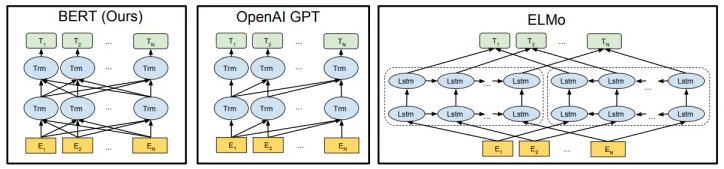

It’s evident from the above image: BERT is bi-directional, GPT is unidirectional (information flows only from left-to-right), and ELMO is shallowly bidirectional.

BERT is based on the Transformer model architecture, instead of LSTMs. We will very soon see the model details of BERT, but in general:

A Transformer works by performing a small, constant number of steps. In each step, it applies an attention mechanism to understand relationships between all words in a sentence, regardless of their respective position. For example, given the sentence, “I arrived at the bank after crossing the river”, to determine that the word “bank” refers to the shore of a river and not a financial institution, the Transformer can learn to immediately pay attention to the word “river” and make this decision in just one step.

### 1.5 How does it work?

BERT relies on a Transformer **(the attention mechanism that learns contextual relationships between words in a text).*** A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, **it only needs the encoder part.** The input to **the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network.** But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:

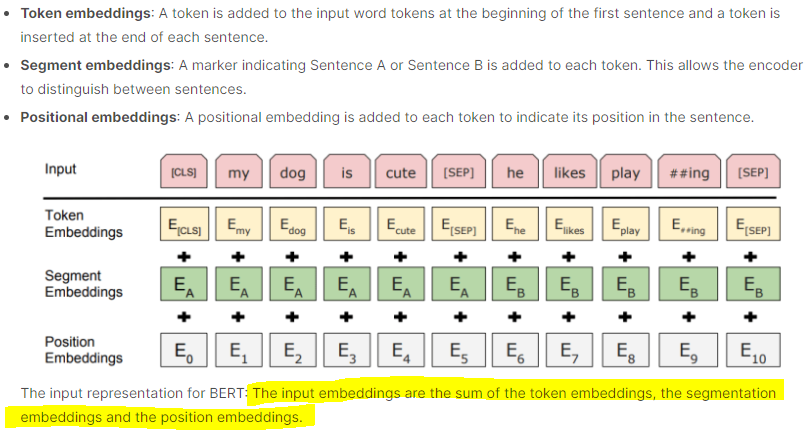

Essentially, the Transformer stacks a layer that maps sequences to sequences, so the output is also a sequence of vectors with a 1:1 correspondence between input and output tokens at the same index. And as we learnt earlier, BERT does not try to predict the next word in the sentence.

BERT is pre-trained on two NLP tasks:

#### 1. Masked Language Modeling (MLM)

BERT is designed as a deeply bidirectional model. The network effectively captures information from both the right and left context of a token from the first layer itself and all the way through to the last layer.

Traditionally, we had language models either trained to predict the next word in a sentence (right-to-left context used in GPT) or language models that were trained on a left-to-right context. This made our models susceptible to errors due to loss in information.

Let us take an example to understand it better

Let’s say we have a sentence – “I love to read data science blogs on Kaggle”. We want to train a bi-directional language model. Instead of trying to predict the next word in the sequence, we can build a model to predict a missing word from within the sequence itself.

Let’s replace “Kaggle” with “[MASK]”. This is a token to denote that the token is missing. We’ll then train the model in such a way that it should be able to predict “Kaggle” as the missing token: “I love to read data science blogs on [MASK].”

This is the crux of a Masked Language Model. The authors of BERT also include some caveats to further improve this technique:

To prevent the model from focusing too much on a particular position or tokens that are masked, the researchers randomly masked 15% of the words.

The masked words were not always replaced by the masked tokens [MASK] because the [MASK] token would never appear during fine-tuning.

So, the researchers used the below technique:

- 80% of the time the words were replaced with the masked token [MASK]
- 10% of the time the words were replaced with random words
- 10% of the time the words were left unchanged

#### 2. Next Sentence Prediction (NSP)

Masked Language Models (MLMs) learn to understand the relationship between words. Additionally, BERT is also trained on the task of Next Sentence Prediction for tasks that require an understanding of the relationship between sentences.

In order to understand relationship between two sentences, BERT training process also uses next sentence prediction. A pre-trained model with this kind of understanding is relevant for tasks like question answering. During training the model gets as input pairs of sentences and it learns to predict if the second sentence is the next sentence in the original text as well.

As we have seen earlier, BERT separates sentences with a special [SEP] token. During training the model is fed with two input sentences at a time such that:

- 50% of the time the second sentence comes after the first one.
- 50% of the time it is a a random sentence from the full corpus.

BERT is then required to predict whether the second sentence is random or not, with the assumption that the random sentence will be disconnected from the first sentence:

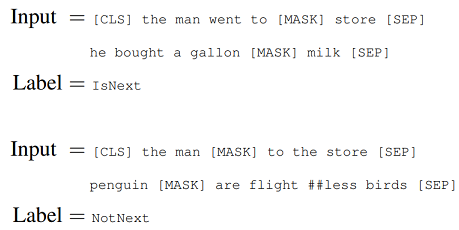

To predict if the second sentence is connected to the first one or not, basically the complete input sequence goes through the Transformer based model, the output of the [CLS] token is transformed into a 2×1 shaped vector using a simple classification layer, and the IsNext-Label is assigned using softmax.

The model is trained with both Masked LM and Next Sentence Prediction together. This is to minimize the combined loss function of the two strategies — “together is better”.

1.6 When can we use it?
BERT outperformed the state-of-the-art across a wide variety of tasks under general language understanding like

-Natural Language Inference
-Sentiment Analysis
-Question Answering
-Paraphrase detection
-Linguistic Acceptability

### 1.7 How to fine-tune BERT?

Using BERT for a specific task is relatively straightforward:

BERT can be used for a wide variety of language tasks, while only adding a small layer to the core model:

1. Classification tasks such as sentiment analysis are done similarly to Next Sentence classification, by adding a classification layer on top of the Transformer output for the [CLS] token.

2. In Question Answering tasks (e.g. SQuAD v1.1), the software receives a question regarding a text sequence and is required to mark the answer in the sequence. Using BERT, a Q&A model can be trained by learning two extra vectors that mark the beginning and the end of the answer.


3. In Named Entity Recognition (NER), the software receives a text sequence and is required to mark the various types of entities (Person, Organization, Date, etc) that appear in the text. Using BERT, a NER model can be trained by feeding the output vector of each token into a classification layer that predicts the NER label.

4. In the fine-tuning training, most hyper-parameters stay the same as in BERT training, and the paper gives specific guidance on the hyper-parameters that require tuning. The BERT team has used this technique to achieve state-of-the-art results on a wide variety of challenging natural language tasks.

### Use Case - Text Classification using BERT

Let us install the pytorch interface for BERT by Hugging Face. (This library contains interfaces for other pretrained language models like OpenAI's GPT and GPT-2.) I have selected the pytorch interface because it strikes a nice balance between the high-level APIs and tensorflow code .

In [242]:
!pip install pytorch-pretrained-bert pytorch-nlp

  Using cached pytorch_pretrained_bert-0.6.2-py3-none-any.whl (123 kB)
     ---------------------------------------- 90.1/90.1 KB 2.5 MB/s eta 0:00:00
     -------------------------------------- 132.1/132.1 KB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 79.4/79.4 KB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 8.5/8.5 MB 8.8 MB/s eta 0:00:00


In [243]:
# Import Libraries

import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Load Dataset:

I will be using The Corpus of Linguistic Acceptability (CoLA) dataset for single sentence classification.

It's a set of sentences labeled as grammatically correct or incorrect. The data is as follows:

Column 1: the code representing the source of the sentence.

Column 2: the acceptability judgment label (0=unacceptable, 1=acceptable).

Column 3: the acceptability judgment as originally notated by the author.

Column 4: the sentence.

In [244]:
df = pd.read_csv("C:/Users/Naim Cavin/Desktop/Combined Reddit Data/Before Covid/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

In [245]:
df.shape


(8551, 4)

In [246]:
df.sample(10)


,sentence_source,label,label_notes,sentence
1692,r-67,1,NaN,Maxwell isn't much of a doctor.
118,cj99,0,*,"The harder it has rained, how much faster a flow that appears in the river?"
6809,m_02,1,NaN,The Beatles all came to Merle Park.
6531,g_81,1,NaN,Who do you think saw you?
5746,c_13,1,NaN,Cedric danced a jolly jig.
3278,l-93,1,NaN,Cornelia lodged with the Smiths.
7381,sks13,1,NaN,"John, who I saw yesterday, will visit us."
4702,ks08,1,NaN,It hasn't yet been determined whether this is feasible.
8199,ad03,1,NaN,"When the executioner arrived, Poseidon was asleep"
3087,l-93,1,NaN,Ellen complained about the situation to Helen.


In [247]:
# Create sentence and label lists
sentences = df.sentence.values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = df.label.values

In [251]:
sentences[0:10]

["[CLS] Our friends won't buy this analysis, let alone the next one we propose. [SEP]",
 "[CLS] One more pseudo generalization and I'm giving up. [SEP]",
 "[CLS] One more pseudo generalization or I'm giving up. [SEP]",
 '[CLS] The more we study verbs, the crazier they get. [SEP]',
 '[CLS] Day by day the facts are getting murkier. [SEP]',
 "[CLS] I'll fix you a drink. [SEP]",
 '[CLS] Fred watered the plants flat. [SEP]',
 '[CLS] Bill coughed his way out of the restaurant. [SEP]',
 "[CLS] We're dancing the night away. [SEP]",
 '[CLS] Herman hammered the metal flat. [SEP]']

Next, import the BERT tokenizer, used to convert our text into tokens that correspond to BERT's vocabulary.



In [252]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

100%|██████████| 231508/231508 [00:00<00:00, 704316.38B/s]


Tokenize the first sentence:
['[CLS]', 'our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.', '[SEP]']


BERT requires specifically formatted inputs. For each tokenized input sentence, we need to create:

- ***input ids:*** a sequence of integers identifying each input token to its index number in the BERT tokenizer vocabulary

- ***segment mask:*** (optional) a sequence of 1s and 0s used to identify whether the input is one sentence or two sentences long. For one sentence inputs, this is simply a sequence of 0s. For two sentence inputs, there is a 0 for each token of the first sentence, followed by a 1 for each token of the second sentence

- ***attention mask:*** (optional) a sequence of 1s and 0s, with 1s for all input tokens and 0s for all padding tokens (we'll detail this in the next paragraph)

- ***labels:*** a single value of 1 or 0. In our task 1 means "grammatical" and 0 means "ungrammatical"

Although we can have variable length input sentences, BERT does requires our input arrays to be the same size. I addressed this by first choosing a maximum sentence length, and then padding and truncating our inputs until every input sequence is of the same length.

- To "pad" our inputs in this context means that if a sentence is shorter than the maximum sentence length, we simply add 0s to the end of the sequence until it is the maximum sentence length.

- If a sentence is longer than the maximum sentence length, then we simply truncate the end of the sequence, discarding anything that does not fit into our maximum sentence length.

I padded and truncated the sequences so that they all become of length MAX_LEN ("post" indicates that we want to pad and truncate at the end of the sequence, as opposed to the beginning) .

**pad_sequences** is a utility function that we're borrowing from Keras. It simply handles the truncating and padding of Python lists.



In [253]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
# In the original paper, the authors used a length of 512.
MAX_LEN = 128

In [254]:
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [255]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [256]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

In [257]:
# Use train_test_split to split our data into train and validation sets for training

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [258]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [259]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

#### Train Model
Now that our input data is properly formatted, it's time to fine tune the BERT model.

For this task, we first want to modify the pre-trained BERT model to give outputs for classification, and then we want to continue training the model on our dataset until that the entire model, end-to-end, is well-suited for our task. Thankfully, the huggingface pytorch implementation includes a set of interfaces designed for a variety of NLP tasks. Though these interfaces are all built on top of a trained BERT model, each has different top layers and output types designed to accomodate their specific NLP task.

We'll load ***BertForSequenceClassification.*** This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

#### Structure of Fine-Tuning Model

As we've showed beforehand, the first token of every sequence is the special classification token ([CLS]). Unlike the hidden state vector corresponding to a normal word token, the hidden state corresponding to this special token is designated by the authors of BERT as an aggregate representation of the whole sentence used for classification tasks. As such, when we feed in an input sentence to our model during training, the output is the length 768 hidden state vector corresponding to this token. The additional layer that we've added on top consists of untrained linear neurons of size [hidden_state, number_of_labels], so [768,2], meaning that the output of BERT plus our classification layer is a vector of two numbers representing the "score" for "grammatical/non-grammatical" that are then fed into cross-entropy loss.

#### The Fine-Tuning Process

Because the pre-trained BERT layers already encode a lot of information about the language, training the classifier is relatively inexpensive. Rather than training every layer in a large model from scratch, it's as if we have already trained the bottom layers 95% of where they need to be, and only really need to train the top layer, with a bit of tweaking going on in the lower levels to accomodate our task.

Sometimes practicioners will opt to "freeze" certain layers when fine-tuning, or to apply different learning rates, apply diminishing learning rates, etc. all in an effort to preserve the good quality weights in the network and speed up training (often considerably). In fact, recent research on BERT specifically has demonstrated that freezing the majority of the weights results in only minimal accuracy declines, but there are exceptions and broader rules of transfer learning that should also be considered. For example, if your task and fine-tuning dataset is very different from the dataset used to train the transfer learning model, freezing the weights may not be a good idea. We'll cover the broader scope of transfer learning in NLP in a future post.

OK, let's load BERT! There are a few different pre-trained BERT models available. "bert-base-uncased" means the version that has only lowercase letters ("uncased") and is the smaller version of the two ("base" vs "large").

In [260]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

100%|██████████| 407873900/407873900 [00:44<00:00, 9243887.38B/s]


Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend the following hyperparameter ranges:

- Batch size: 16, 32 
- Learning rate (Adam): 5e-5, 3e-5, 2e-5 
- Number of epochs: 2, 3, 4

In [262]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],'weight_decay_rate': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],'weight_decay_rate': 0.0}]

In [263]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = BertAdam(optimizer_grouped_parameters,lr=2e-5,warmup=.1)

t_total value of -1 results in schedule not being applied


For each pass in the training loop we have a training phase and a validation phase.

At each pass we need to:

**Training loop:**

- Tell the model to compute gradients by setting the model in train mode
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Clear out the gradients calculated in the previous pass. In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out
- Forward pass (feed input data through the network)
- Backward pass (backpropagation)
- Tell the network to update parameters with optimizer.step()
- Track variables for monitoring progress

**Evalution loop:**

- Tell the model not to compute gradients by setting th emodel in evaluation mode
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Forward pass (feed input data through the network)
- Compute loss on our validation data and track variables for monitoring progress

In [264]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [267]:
t = [] 

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs 
epochs = 2

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
      
    
    
    # Training
    
    # Set our model to training mode (as opposed to evaluation mode)
    model.train()
    
    # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        
        
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
    
    print("Train loss: {}".format(tr_loss/nb_tr_steps))
      
      
    # Validation
  
    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()
  
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
  
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
    
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
    
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]C:\Users\Naim Cavin\anaconda3\lib\site-packages\torch\cuda\__init__.py:143: UserWarning: 
NVIDIA GeForce RTX 3060 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the NVIDIA GeForce RTX 3060 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))
Epoch:   0%|          | 0/2 [36:29<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper__index_select)